# 直方图-1：查找、绘制和分析

### 目标

学会
- 使用OpenCV和Numpy函数查找直方图
- 使用OpenCV和Matplotlib函数绘制直方图 
- 你将看到以下函数：**cv.calcHist**()，**np.histogram**()等。

### 理论

那么直方图是什么？您可以将直方图视为图形或绘图，从而可以总体了解图像的强度分布。它是在X轴上具有像素值（不总是从0到255的范围），在Y轴上具有图像中相应像素数的图。

这只是理解图像的另一种方式。通过查看图像的直方图，您可以直观地了解该图像的对比度，亮度，强度分布等。当今几乎所有图像处理工具都提供直方图功能。以下是剑桥彩色网站的图片，我建议您访问该网站以获取更多详细信息。

![](data/histogram_sample.jpg)

您可以看到图像及其直方图。（请记住，此直方图是针对灰度图像而非彩色图像绘制的）。直方图的左侧区域显示图像中较暗像素的数量，而右侧区域则显示明亮像素的数量。从直方图中，您可以看到暗区域多于亮区域，而中间调的数量（中间值的像素值，例如127附近）则非常少。

### 寻找直方图

现在我们有了一个关于直方图的想法，我们可以研究如何找到它。OpenCV和Numpy都为此内置了功能。在使用这些功能之前，我们需要了解一些与直方图有关的术语。

**BINS**：上面的直方图显示每个像素值的像素数，即从0到255。即，您需要256个值来显示上面的直方图。但是考虑一下，如果您不需要分别找到所有像素值的像素数，而是找到像素值间隔中的像素数怎么办？
例如，您需要找到介于0到15之间的像素数，然后找到16到31之间，...，240到255之间的像素数。只需要16个值即可表示直方图。这就是在OpenCV教程中有关直方图的示例中显示的内容。

因此，您要做的就是将整个直方图分成16个子部分，每个子部分的值就是其中所有像素数的总和。
每个子部分都称为“ BIN”。在第一种情况下，bin的数量为256个（每个像素一个），而在第二种情况下，bin的数量仅为16个。BINS由OpenCV文档中的**histSize**术语表示。

**DIMS**：这是我们为其收集数据的参数的数量。在这种情况下，我们仅收集关于强度值的一件事的数据。所以这里是1。

**RANGE**：这是您要测量的强度值的范围。通常，它是`[0,256]`，即所有强度值。

#### 1. OpenCV中的直方图计算

因此，现在我们使用**cv.calcHist**()函数查找直方图。让我们熟悉一下该函数及其参数：
<center>cv.calcHist（images，channels，mask，histSize，ranges [，hist [，accumulate]]）</center>

1. images：它是uint8或float32类型的源图像。它应该放在方括号中，即“ [img]”。
2. channels：也以方括号给出。它是我们计算直方图的通道的索引。例如，如果输入为灰度图像，则其值为[0]。对于彩色图像，您可以传递[0]，[1]或[2]分别计算蓝色，绿色或红色通道的直方图。
3. mask：图像掩码。为了找到完整图像的直方图，将其指定为“无”。但是，如果要查找图像特定区域的直方图，则必须为此创建一个掩码图像并将其作为掩码。（我将在后面显示一个示例。）
4. histSize：这表示我们的BIN计数。需要放在方括号中。对于全尺寸，我们通过[256]。
5. ranges：这是我们的RANGE。通常为[0,256]。

因此，让我们从示例图像开始。只需以灰度模式加载图像并找到其完整直方图即可。

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('data/home.jpg',0)
hist = cv.calcHist([img],[0],None,[256],[0,256])
print(hist)

[[1.630e+02]
 [3.500e+01]
 [3.000e+01]
 [4.700e+01]
 [6.000e+01]
 [5.800e+01]
 [5.700e+01]
 [6.200e+01]
 [6.000e+01]
 [6.400e+01]
 [7.500e+01]
 [9.500e+01]
 [7.800e+01]
 [1.970e+02]
 [1.100e+02]
 [1.250e+02]
 [1.060e+02]
 [1.160e+02]
 [1.060e+02]
 [1.300e+02]
 [1.120e+02]
 [1.010e+02]
 [1.100e+02]
 [1.250e+02]
 [9.300e+01]
 [1.280e+02]
 [1.190e+02]
 [1.170e+02]
 [1.210e+02]
 [1.390e+02]
 [1.270e+02]
 [1.290e+02]
 [1.550e+02]
 [1.390e+02]
 [1.430e+02]
 [1.480e+02]
 [1.540e+02]
 [1.860e+02]
 [1.530e+02]
 [1.880e+02]
 [2.060e+02]
 [1.980e+02]
 [2.240e+02]
 [2.380e+02]
 [2.150e+02]
 [2.100e+02]
 [2.300e+02]
 [2.110e+02]
 [2.500e+02]
 [2.600e+02]
 [2.350e+02]
 [2.490e+02]
 [2.580e+02]
 [2.470e+02]
 [2.300e+02]
 [2.640e+02]
 [2.970e+02]
 [2.470e+02]
 [2.910e+02]
 [3.070e+02]
 [3.070e+02]
 [2.880e+02]
 [3.040e+02]
 [2.990e+02]
 [3.060e+02]
 [3.320e+02]
 [3.340e+02]
 [4.620e+02]
 [1.363e+03]
 [1.982e+03]
 [3.033e+03]
 [2.714e+03]
 [3.393e+03]
 [3.117e+03]
 [3.438e+03]
 [3.132e+03]
 [2.934e+03]

hist是256x1的数组，每个值对应于该图像中具有相应像素值的像素数。

#### 2. numpy的直方图计算

Numpy还为您提供了一个函数**np.histogram**()。因此，除了**calcHist**()函数外，您可以尝试下面的代码：

In [2]:
hist,bins = np.histogram(img.ravel(),256,[0,256])
print(hist)

[ 163   35   30   47   60   58   57   62   60   64   75   95   78  197
  110  125  106  116  106  130  112  101  110  125   93  128  119  117
  121  139  127  129  155  139  143  148  154  186  153  188  206  198
  224  238  215  210  230  211  250  260  235  249  258  247  230  264
  297  247  291  307  307  288  304  299  306  332  334  462 1363 1982
 3033 2714 3393 3117 3438 3132 2934 2900 3295 2980 2811 3072 2864 2645
 2595 2625 3039 2627 2499 2131 1794 1814 1929 1899 1822 1711 1709 1717
 1739 1584 1522 1690 1392 1192 1262 1072 1240 1328 1584 2077 2807 3908
 2347 2041 1390 1468 1067 1071  968  823  776  816  690  735  651  671
  613  636  604  597  566  664  622  605  608  606  620  614  584  605
  593  653  678  752  792  824  846  915  804  810  714  727  809  752
  737  648  669  724  660  674  710  631  662  686  648  685  668  681
  662  695  706  716  697  715  712  736  773  834  819  919 1083 1196
 1397 1891 1888 1689 1558 1634 1827 1768 1661 1775 1711 1619  936  736
  633 

hist与我们之前计算的相同。但是bin将具有257个元素，因为Numpy计算出bin的范围为`0-0.99`、`1-1.99`、`2-2.99`等。因此最终范围为`255-255.99`。为了表示这一点，他们还在最后添加了256。但是我们不需要256。最多255就足够了。

- **另外**
Numpy还有另一个函数**np.bincount**()，它比np.histogram()快10倍左右。因此，对于一维直方图，您可以更好地尝试一下。不要忘记在np.bincount中设置minlength = 256。例如，`hist = np.bincount(img.ravel()，minlength = 256)`

> **注意**
  OpenCV函数比np.histogram()快大约40倍。因此，尽可能使用OpenCV函数。
 
现在我们应该绘制直方图，但是怎么绘制？

### 绘制直方图

有两种方法，
1. 简短的方法：使用Matplotlib绘图功能
2. 稍长的方法：使用OpenCV绘图功能

#### 1. 使用Matplotlib

Matplotlib带有直方图绘图功能：`matplotlib.pyplot.hist()`
它直接找到直方图并将其绘制。您无需使用**calcHist**()或np.histogram()函数来查找直方图。请参见下面的代码：

<function matplotlib.pyplot.show(close=None, block=None)>

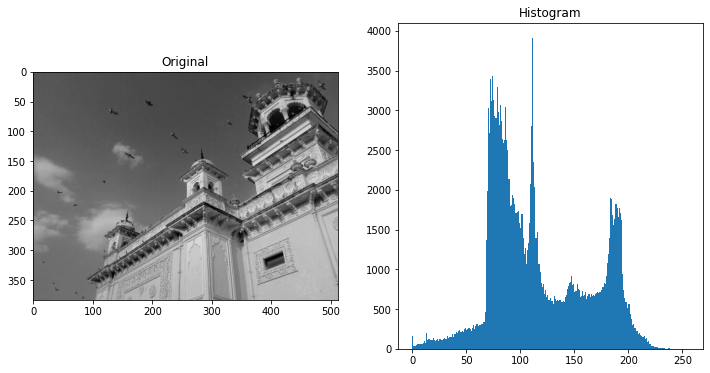

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('data/home.jpg',0)

plt.figure(figsize=(12, 6))

plt.subplot(121),plt.imshow(img, 'gray'),plt.title('Original')
plt.subplot(122),plt.hist(img.ravel(),256,[0,256]),plt.title('Histogram')

plt.show

或者，您可以使用matplotlib的法线图，这对于BGR图是很好的。为此，您需要首先找到直方图数据。试试下面的代码：

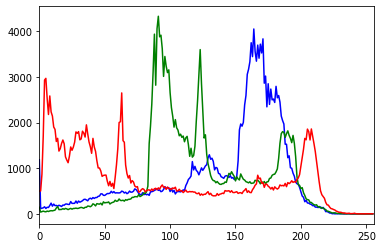

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('data/home.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

您可以从上图中得出，蓝色在图像中具有一些高值域（显然这应该是由于天空）

#### 2. 使用 OpenCV

好吧，在这里您可以调整直方图的值及其bin值，使其看起来像x，y坐标，以便您可以使用**cv.line**()或cv.polyline()函数绘制它以生成与上述相同的图像。OpenCV-Python2官方示例已经提供了此功能。检查示例/python/hist.py中的代码。

### 掩码的应用

我们使用了`cv.calcHist()`来查找整个图像的直方图。如果你想找到图像某些区域的直方图呢?只需创建一个掩码图像，在你要找到直方图为白色，否则黑色。然后把这个作为掩码传递。

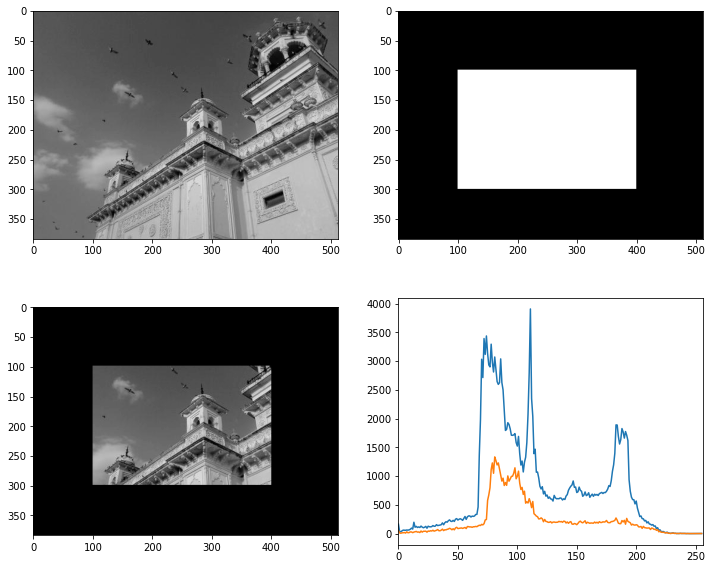

In [5]:
img = cv.imread('data/home.jpg',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv.bitwise_and(img,img,mask = mask)

# 计算掩码区域和非掩码区域的直方图
# 检查作为掩码的第三个参数
hist_full = cv.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv.calcHist([img],[0],mask,[256],[0,256])

plt.figure(figsize=(12, 10))

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

查看结果。在直方图中，蓝线表示完整图像的直方图，橙线表示掩码区域的直方图。

### 附加资源

1. Cambridge in Color website：http://www.cambridgeincolour.com/tutorials/histograms1.htm

### 练习